# Why do we extract several times with smaller volumes than a single extraction with a huge volume ?

Influence of the number of extraction and equilibrium constant on the recovery yield during a liquid-liquid extraction


$$K = \frac{[A]_\mathrm{org}}{[A]_\mathrm{eau}}$$
* `rV` is the ratio $\frac{V_\mathrm{org}(total)}{V_\mathrm{eau}}$ to show the influence of the total volume of organic extractant
* `n` is the number of extraction with each volume of organic phase being $\frac{V_\mathrm{org}(total)}{n}$

The limit value for $n \to \infty$ is $\rho = 1-\exp(-K \times rV)$

Informations
------------
Author : Martin Vérot  from ENS de Lyon, France

Licence : Creative Commons CC-BY-NC-SA 4.0

# The theory

We suppose that initially, everything is in the aqueous solution. The total amount is $n^0$. The aqueous layer has a volume of 1 and the full organic layer has a volume of `rV`.

Each organic layer has a volume $V_{org}$ of $V_{org} = \dfrac{rV}{n}$

After one extraction ($j=1$), at the equilibrium :
$$\begin{align}K ={}& \dfrac{n^1_{org}}{V_{org}}\frac{V_{aq}}{n^1_{aq}}  = \dfrac{n^1_{org}}{n^1_{aq}} \times \frac{V_{aq}}{V_{org}} = \underbrace{\dfrac{n^1_{org}}{n^1_{aq}}}_{=\alpha} \dfrac{n}{rV}\\
{n^1_{org}} + {n^1_{aq}} ={}& n^0\end{align} $$

Which gives :
$$\begin{align}n^1_{aq} ={}& \dfrac{n^0}{1 + \frac{K \times rV}{n}} = n^0 \underbrace{ \dfrac{1}{1 + \frac{K \times rV}{n}} }_{=q}\\
n^1_{org} ={}&n^0 - \dfrac{n^0}{1 + \frac{K rV}{n}} = \dfrac{\frac{K \times rV}{n}}{1 + \frac{K \times rV}{n}} \end{align}$$

A similar treatment for the consecutive extractions gives :
$$\begin{align}n^j_{aq} ={}& \dfrac{n^{j-1}}{1 + \frac{K \times rV}{n}} = n^0 q^j\end{align}$$

Thus the recovery rate which is the total amount of compound extracted in the organic phases divided by $n^0$ is equal to :

$$\rho = \dfrac{n^1_{org}+n^2_{org}+\cdots+n^n_{org}}{n^0} = \dfrac{n^0 - n^n_{aq}}{n^0} = 1 - q^n $$

# Computation of the extraction yield

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def extraction_yield_final(K,rV,n):
    """
    Computes the extraction yield for :
    - rV : the ratio of the organic phase over the aqueous phase
    - n the number of extractions
    - K the equilibrium constant between the organic phase and the aqueous phase A_aq=A_org
    """
    q = 1/(1+K*rV/n)
    return 1 - q**n

## For `K` and `rV` fixed as a function of `n`
 We can now plot it as a function of $n$ for $rV$ and $K$ fixed. The limit is given by $\rho = 1-\exp(-K \times rV)$.

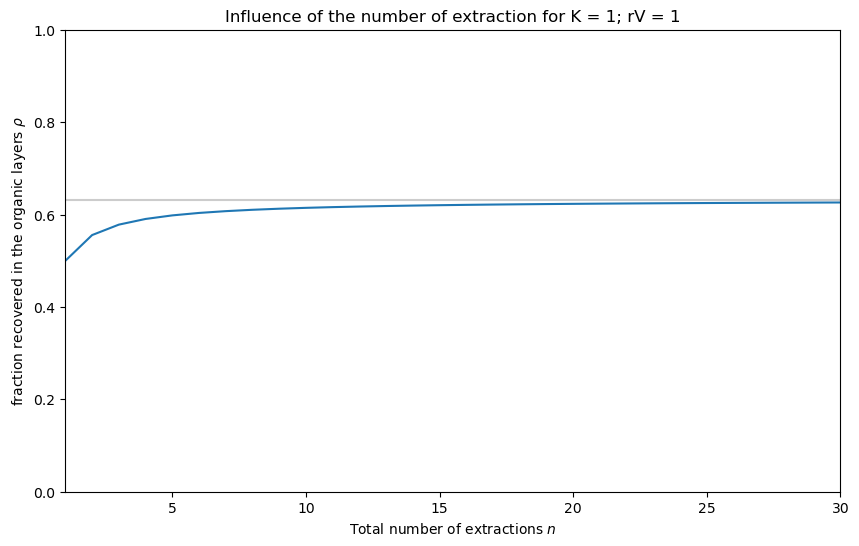

In [2]:
nmax = 31
K = 1
rV = 1
ns = np.arange(1,nmax)

fig,axes = plt.subplots(1,1,figsize=(10,6))
ax1 = plt.subplot(1,1,1)
ax1.set_title('Influence of the number of extraction for K = {}; rV = {}'.format(K,rV))
ax1.set_xlabel('Total number of extractions $n$')
ax1.set_ylabel('fraction recovered in the organic layers $\\rho$')
ax1.set_xlim(1,nmax-1)
ax1.set_ylim(0,1)
#function of n
ax1.plot(ns,extraction_yield_final(K,rV,ns))
#limit value for n = \infty
ax1.hlines( 1-np.exp(-K * rV),1,nmax-1,color='#cccccc')
plt.show()

## For `K` and `n` fixed as a function of `rV`

We can now inspect the influence of $rV$ on the yield.

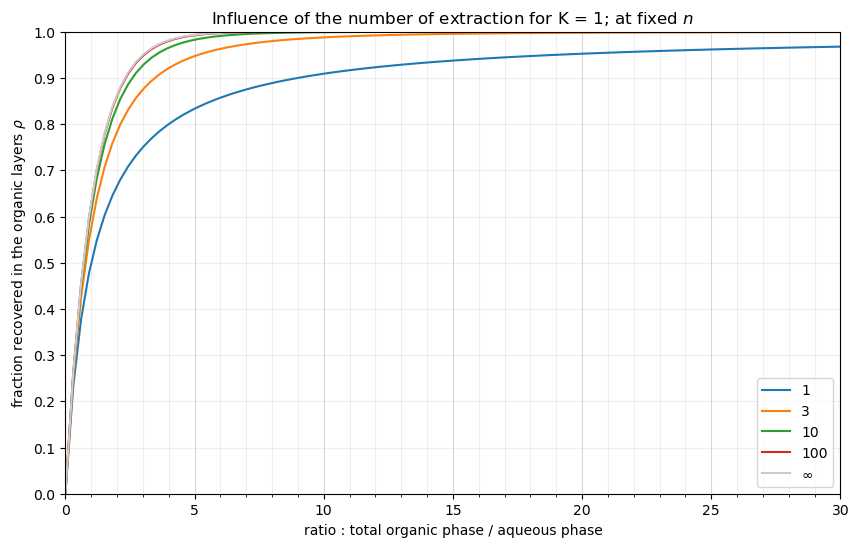

In [3]:
nmax = 31
K = 1
rV = np.linspace(1e-3,30,100)

fig,axes = plt.subplots(1,1,figsize=(10,6))
ax1 = plt.subplot(1,1,1)
ax1.set_title('Influence of the number of extraction for K = {}; at fixed $n$'.format(K))
ax1.set_xlabel('ratio : total organic phase / aqueous phase')
ax1.set_ylabel('fraction recovered in the organic layers $\\rho$')
ax1.set_xlim(0.,np.max(rV))
ax1.set_ylim(0,1)
#function of rV for different values of n
for n in [1,3,10,100]:
    ax1.plot(rV,extraction_yield_final(K,rV,n),label = n)
#asymptotic value
ax1.plot(rV,1-np.exp(-K * rV),label = '$\infty$',color='#cccccc')

#Putting ticks to help the reading
ax1.set_xticks(np.arange(nmax), minor=True)
ax1.set_yticks(np.linspace(0,1,11))
#ax1.grid(which='both',axis='x')
ax1.grid(which='minor', alpha=0.2)
ax1.grid(which='major',axis='x', alpha=0.5)
ax1.grid(which='major',axis='y', alpha=0.2)
ax1.legend()
plt.show()

We can see that :
* a single extraction for rV = 2 gives a yield of roughly  67 % while doing three extractions with the same total volume three times gives a yield of roughly  80 % ;
* to obtain the same overall yield of 90 %, we can either perform a single extraction with rv = 9 or three extraction with rV = 3.5 : it means that we can save a lot of solvent in this case !

## For `rV` and `n` fixed as a function of `K`
And we can do the same to see the influence of $K$

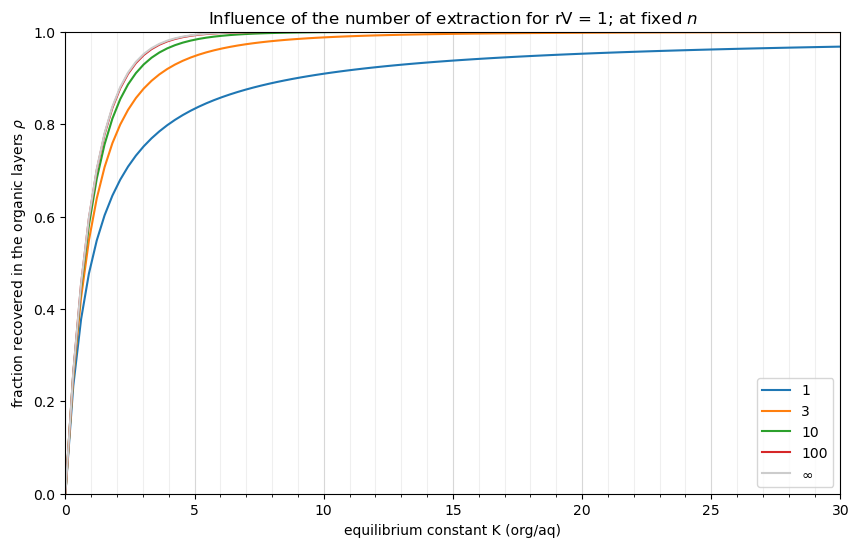

In [4]:
nmax = 31
K = np.linspace(1e-3,30,100)
rV = 1

fig,axes = plt.subplots(1,1,figsize=(10,6))
ax1 = plt.subplot(1,1,1)
ax1.set_title('Influence of the number of extraction for rV = {}; at fixed $n$'.format(rV))
ax1.set_xlabel('equilibrium constant K (org/aq)')
ax1.set_ylabel('fraction recovered in the organic layers $\\rho$')
ax1.set_xlim(0.,np.max(K))
ax1.set_ylim(0,1)
#function of rV for different values of n
for n in [1,3,10,100]:
    ax1.plot(K,extraction_yield_final(K,rV,n),label = n)
#asymptotic value
ax1.plot(K,1-np.exp(-K * rV),label = '$\infty$',color='#cccccc')

#Putting ticks to help the reading
ax1.set_xticks(np.arange(nmax), minor=True)
#ax1.grid(which='both',axis='x')
ax1.grid(which='minor',axis='x', alpha=0.2)
ax1.grid(which='major',axis='x', alpha=0.5)

ax1.legend()
plt.show()

# As a function of `K`, `rV`, `n` and for the `j`th extraction

In [5]:
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline


nmax = 30

def extraction_yield_intermediate(K,rV,j,n):
    """
    Computes the extraction yield for :
    - rV : the ratio of the organic phase over the aqueous phase
    - n the TOTAL number of extractions  
    - K the equilibrium constant between the organic phase and the aqueous phase A_aq=A_org
    - j the rank of the extraction 1<= j <= n
    """
    q = 1/(1+K*rV/n)
    return 1 - q**j


def extraction_rendering(n,logK,rV):
    """
    Full rendering of the extraction yield
    """
    #Taking the equilibrium constant
    K = np.exp(logK)
    #Computations for the n extractions of a volume V
    n = int(n)
    ns = np.arange(1,nmax+1)
    
    js = np.arange(1,n+1)
    intermediate_yields = extraction_yield_intermediate(K,rV,js,n)
    final_yields = extraction_yield_final(K,rV,ns)
    
    
    fig,axes = plt.subplots(1,2,figsize=(10,6))
    
    
    #####
    #Left graph
    #####
    #Influence of the number of extractions
    ax1 = plt.subplot(1,2,1)
    
    #as a function of n
    ax1.plot(ns,final_yields, label='$\\rho$')    
    ax1.hlines( 1-np.exp(-K * rV),0,nmax,color='#cccccc')    

    #Highlighting the data for the given value of n
    #Plotting quantity extracted for a given number of extractions
    ax1.plot(n,extraction_yield_final(K,rV,n),marker='o',color='C0') 
    ax1.text(n+0.5, extraction_yield_final(K,rV,n)-0.025,'{:.2f}'.format(extraction_yield_final(K,rV,n)))    
    
    #left graph
    ax1.set_title('Influence of some parameters on the liquid-liquid extraction')
    ax1.set_xlabel('Total number of extractions $n$')
    ax1.set_ylabel('fraction recovered in the organic layers $1-q^n$')
    ax1.set_xlim(0.,nmax)
    ax1.set_ylim(0,1)

    #####
    #Right graph
    #####    
    ##succcessive quantities recovered
    ax4 = plt.subplot(1,2,2)

    #Plotting quantity extracted at each step
    ax4.plot(js,intermediate_yields,marker='+',color='#cccccc')     
    #Text to show the numbers
    for j in js:
        if n<=10:
            ax4.text(j+0.15*(1-np.exp(-n)),
                     intermediate_yields[j-1]-0.05*j/n+0.05*np.exp(-j),
                     '{:.2f}'.format(intermediate_yields[j-1]))
        else:
            if j%2 == 0:
                ax4.text(j+0.15,intermediate_yields[j-1]-0.03,'{:.2f}'.format(intermediate_yields[j-1]))
            else:                
                ax4.text(j-0.35,intermediate_yields[j-1]+0.01,'{:.2f}'.format(intermediate_yields[j-1]),horizontalalignment='right')    

                
    ax4.set_xlabel('partial extractions $j \leqslant  n$, j$^{th}$ extraction')
    ax4.set_ylabel('total fraction recovered after $j$ extractions')
    ax4.set_xlim(0,n+1)   
    ax4.set_ylim(0,1)  
    plt.show()
    


interactive_plot = widgets.interactive(extraction_rendering,
                                       n=widgets.IntSlider(value = 1, min =1,max=nmax,step=1, continuous_update=False),
                                       logK=widgets.FloatSlider(value = 1, min =0,max=30,step=1e-2, continuous_update=False),
                                       rV = widgets.FloatSlider(value = 1, min =1,max=10,step=1e-2, continuous_update=False))


output = interactive_plot.children[-1]
#output.layout.height = '580px'
interactive_plot

interactive(children=(IntSlider(value=1, continuous_update=False, description='n', max=30, min=1), FloatSlider…